In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import combinations
from ast import literal_eval
from math import log
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import csv

In [2]:
df = pd.read_csv('movie_all.csv',encoding ='utf-8')

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# drop unnecessary columns
df = df.drop(columns=['Unnamed: 0', 'actor1_gender', 'actor2_gender', 'actor3_gender', 'actor4_gender', 'actor5_gender', 'actor_number', 'director_gender', 'director_number', 'producer_number'])

In [4]:
# replace string 'none' in some cells with np.NaN(nontype)
df = df.replace('none', np.NaN)

In [5]:
# make 'release_date' column be datetime type
df['release_date'] = pd.to_datetime(df['release_date'])

In [6]:
# add release_year column
df['release_year'] = df['release_date'].dt.year

In [7]:
df.columns.get_loc("actor1_name")

22

In [8]:
# make actor1_name to actor5_name in one
# and drop nan 

alist = []
for ind, value in df.iloc[:, 22:27].iterrows():
    
    # set these five actors 
    
    ok = set(value.squeeze()) # for the first row is {nan, 'Eetu Hilkamo', 'Matti Pellonpää', 'Susanna Haavisto', 'Turo Pajala'}
    
    # delect nan in the set
    
    ok = {x for x in ok if x==x} 
    # for the first row is 
    # {'Susanna Haavisto', 'Turo Pajala', 'Matti Pellonpää', 'Eetu Hilkamo'}
    
    alist.append(ok)
alist

[{'Eetu Hilkamo', 'Matti Pellonpää', 'Susanna Haavisto', 'Turo Pajala'},
 {'Esko Nikkari',
  'Kati Outinen',
  'Kylli Köngäs',
  'Matti Pellonpää',
  'Sakari Kuosmanen'},
 {'Antonio Banderas', 'Jennifer Beals', 'Madonna', 'Marisa Tomei', 'Tim Roth'},
 {'Cuba Gooding Jr.',
  'Denis Leary',
  'Emilio Estevez',
  'Jeremy Piven',
  'Peter Greene'},
 set(),
 {'Milton Welsh', 'Rita Lengyel'},
 {'Alec Guinness',
  'Carrie Fisher',
  'Harrison Ford',
  'Mark Hamill',
  'Peter Cushing'},
 {'Albert Brooks',
  'Alexander Gould',
  'Brad Garrett',
  'Ellen DeGeneres',
  'Willem Dafoe'},
 {'Gary Sinise',
  'Mykelti Williamson',
  'Robin Wright',
  'Sally Field',
  'Tom Hanks'},
 {'Annette Bening',
  'Kevin Spacey',
  'Mena Suvari',
  'Thora Birch',
  'Wes Bentley'},
 {'Dorothy Comingore',
  'George Coulouris',
  'Joseph Cotten',
  'Orson Welles',
  'Ray Collins'},
 {'Björk', 'Catherine Deneuve', 'David Morse', 'Joel Grey', 'Peter Stormare'},
 {'Abigail Stone',
  'Maria Bello',
  'Maurice Roeves',
 

In [9]:
# add alist into one column in df

df_2=df.assign(actor_set=alist)

In [10]:
df_2['actor_num']  = df_2['actor_set'].str.len()

In [11]:
# for further group by, order the actor set
# ex: {A,B} is the same as {B,A} 
actor_list = []
for ind, value in df_2.iterrows():
    ok = sorted(value['actor_set'])
    actor_list.append(ok)
actor_list

[['Eetu Hilkamo', 'Matti Pellonpää', 'Susanna Haavisto', 'Turo Pajala'],
 ['Esko Nikkari',
  'Kati Outinen',
  'Kylli Köngäs',
  'Matti Pellonpää',
  'Sakari Kuosmanen'],
 ['Antonio Banderas', 'Jennifer Beals', 'Madonna', 'Marisa Tomei', 'Tim Roth'],
 ['Cuba Gooding Jr.',
  'Denis Leary',
  'Emilio Estevez',
  'Jeremy Piven',
  'Peter Greene'],
 [],
 ['Milton Welsh', 'Rita Lengyel'],
 ['Alec Guinness',
  'Carrie Fisher',
  'Harrison Ford',
  'Mark Hamill',
  'Peter Cushing'],
 ['Albert Brooks',
  'Alexander Gould',
  'Brad Garrett',
  'Ellen DeGeneres',
  'Willem Dafoe'],
 ['Gary Sinise',
  'Mykelti Williamson',
  'Robin Wright',
  'Sally Field',
  'Tom Hanks'],
 ['Annette Bening',
  'Kevin Spacey',
  'Mena Suvari',
  'Thora Birch',
  'Wes Bentley'],
 ['Dorothy Comingore',
  'George Coulouris',
  'Joseph Cotten',
  'Orson Welles',
  'Ray Collins'],
 ['Björk', 'Catherine Deneuve', 'David Morse', 'Joel Grey', 'Peter Stormare'],
 ['Abigail Stone',
  'Maria Bello',
  'Maurice Roeves',
  'R

In [12]:
# stored actor_list as a tuple in a column
df_2=df_2.assign(actor_list=actor_list)
df_2['actor_list'] = df_2['actor_list'].apply(tuple)

In [13]:
df_2.to_csv('movie_final.csv')

In [14]:
df_3 = df_2[df_2['release_year'] >= 2001].reset_index(drop = True)

In [15]:
# groupby 導演及年份，因actor_list欄位一個cell可能含有多個elements, 
# 所以groupby時actor_list是用sum的方式將這些elements合併
# ex: ('Jiaxuan Li', 'Tang Wei, Tian Yu') + ('Tao Zeru',) = ('Jiaxuan Li', 'Tang Wei, Tian Yu', 'Tao Zeru')
d1 = df_3.replace('',None).groupby(['director_name', 'release_year']).agg({'actor_list':'sum'}).reset_index()
d1

/anaconda3/lib/python3.7/site-packages/pandas/core/missing.py:44: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask = arr == x


,director_name,release_year,actor_list
0,\tCheung Chi-Sing,2002.0,"(Anthony Wong, Gillian Chung, Lam Suet, Ruby W..."
1,\tHuang Jian-Zhong,2004.0,"(Tao Zeru,)"
2,\tHuang Jian-Zhong,2005.0,"(Gu Yang, Natalie Meng Yao, Wang Qingxiang, Wa..."
3,\tZhang Jing,2005.0,"(Cao Cui-Fen, Jiang Qinqin, Li Hai-Tao, Zhang ..."
4,\tZhang Jing,2006.0,"(Jiaxuan Li, Tang Wei, Tian Yu)"
5,\tZhang Jing,2008.0,"(He Mei-Tian, Kenny Kwan, Law Kar-Ying, Zhang ..."
6,Faris Kermani,2011.0,()
7,Faris Kermani,2013.0,"(Lucy Briers,)"
8,Anna van Keimpema,2010.0,"(Johnny de Mol, Lidewij Mahler)"
9,Anna van Keimpema,2013.0,"(Aiko Beemsterboer,)"


In [16]:
actor_list2 = list(d1['actor_list'])

In [17]:
edges_list = []
for i in actor_list2:
    comb = combinations(i, 2)
    for j in list(comb): 
        edges_list.append(j)
edges_list

[('Anthony Wong', 'Gillian Chung'),
 ('Anthony Wong', 'Lam Suet'),
 ('Anthony Wong', 'Ruby Wong'),
 ('Anthony Wong', 'Sam Lee'),
 ('Gillian Chung', 'Lam Suet'),
 ('Gillian Chung', 'Ruby Wong'),
 ('Gillian Chung', 'Sam Lee'),
 ('Lam Suet', 'Ruby Wong'),
 ('Lam Suet', 'Sam Lee'),
 ('Ruby Wong', 'Sam Lee'),
 ('Gu Yang', 'Natalie Meng Yao'),
 ('Gu Yang', 'Wang Qingxiang'),
 ('Gu Yang', 'Wang Tonghui'),
 ('Natalie Meng Yao', 'Wang Qingxiang'),
 ('Natalie Meng Yao', 'Wang Tonghui'),
 ('Wang Qingxiang', 'Wang Tonghui'),
 ('Cao Cui-Fen', 'Jiang Qinqin'),
 ('Cao Cui-Fen', 'Li Hai-Tao'),
 ('Cao Cui-Fen', 'Zhang Jingchu'),
 ('Jiang Qinqin', 'Li Hai-Tao'),
 ('Jiang Qinqin', 'Zhang Jingchu'),
 ('Li Hai-Tao', 'Zhang Jingchu'),
 ('Jiaxuan Li', 'Tang Wei'),
 ('Jiaxuan Li', 'Tian Yu'),
 ('Tang Wei', 'Tian Yu'),
 ('He Mei-Tian', 'Kenny Kwan'),
 ('He Mei-Tian', 'Law Kar-Ying'),
 ('He Mei-Tian', 'Zhang Meng'),
 ('Kenny Kwan', 'Law Kar-Ying'),
 ('Kenny Kwan', 'Zhang Meng'),
 ('Law Kar-Ying', 'Zhang Meng'),

In [18]:
G = nx.Graph()
G.add_edges_from(edges_list)

In [19]:
degrees = []
for n in G.nodes():
    degree = len(list(G.neighbors(n)))
    degrees.append(degree)
# Print the degrees
print(degrees[:100])

[190, 84, 177, 36, 103, 3, 7, 3, 9, 3, 3, 3, 74, 7, 40, 2, 3, 17, 51, 3, 45, 16, 156, 122, 104, 53, 73, 3, 9, 3, 6, 99, 14, 42, 4, 49, 2, 5, 18, 3, 3, 7, 3, 41, 40, 53, 88, 3, 15, 13, 7, 19, 14, 8, 7, 37, 29, 70, 68, 9, 62, 16, 41, 43, 2, 2, 88, 3, 3, 3, 3, 38, 47, 26, 73, 53, 25, 31, 48, 20, 15, 22, 23, 7, 13, 5, 2, 41, 15, 38, 15, 17, 4, 4, 4, 10, 6, 6, 6, 8]


In [20]:
degrees_ord = sorted(degrees, reverse=True)
print(degrees_ord[:100])

[633, 393, 389, 378, 360, 355, 326, 305, 297, 294, 288, 285, 284, 271, 269, 261, 261, 259, 258, 255, 254, 252, 251, 250, 240, 238, 237, 236, 234, 234, 233, 229, 229, 227, 227, 226, 224, 223, 223, 221, 220, 219, 218, 217, 217, 217, 217, 216, 216, 215, 215, 214, 214, 212, 212, 211, 210, 210, 209, 208, 206, 206, 205, 205, 205, 204, 204, 203, 202, 202, 202, 201, 201, 201, 200, 200, 199, 198, 198, 197, 197, 196, 196, 195, 194, 192, 192, 190, 190, 190, 189, 188, 188, 188, 187, 187, 186, 186, 186, 185]


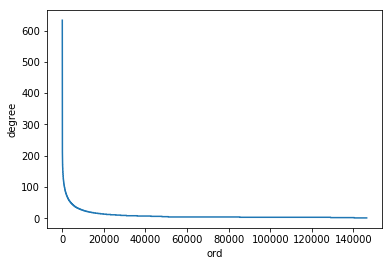

In [21]:
plt.plot(degrees_ord)
plt.ylabel('degree')
plt.xlabel('ord')
plt.show() 

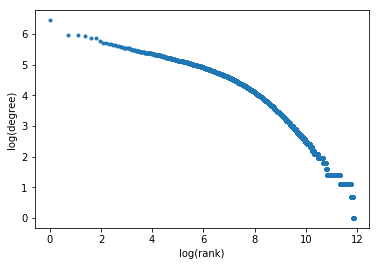

In [22]:
log_x = [log(i) for i in range(1, len(degrees_ord)+1)]
log_y = [log(i) for i in degrees_ord]
plt.plot(log_x,log_y,'.')
plt.ylabel('log(degree)')
plt.xlabel('log(rank)')
plt.show()

In [23]:
X = np.array([[i] for i in log_x])
Y = np.array([[i] for i in log_y])

In [24]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)
diabetes_y_pred = regr.predict(X)
# R square
print('R square: %.10f' % r2_score(Y, diabetes_y_pred))
print(regr.coef_)
print('intercept : %.10f' % regr.intercept_ )

R square: 0.9402602210
[[-0.86645793]]
intercept : 11.0422771767


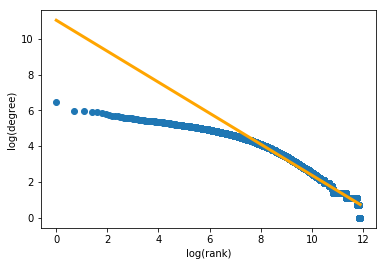

In [25]:
plt.scatter(X, Y)
plt.plot(X, diabetes_y_pred, color='orange', linewidth=3)

plt.ylabel('log(degree)')
plt.xlabel('log(rank)')

plt.show()

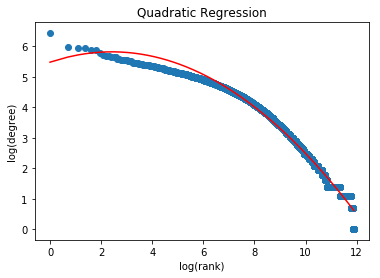

R square: 0.9568087283


In [26]:
poly = PolynomialFeatures(degree = 2) 
X_poly = poly.fit_transform(X) 
  
poly.fit(X_poly, Y) 
lin2 = linear_model.LinearRegression() 
lin2.fit(X_poly, Y)
plt.scatter(X, Y) 
  
plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'red') 
plt.title('Quadratic Regression') 
plt.xlabel('log(rank)') 
plt.ylabel('log(degree)') 
  
plt.show()
print('R square: %.10f' % r2_score(Y, lin2.predict(poly.fit_transform(X))))

In [27]:
print(lin2.coef_)
print('intercept : %.10f' % lin2.intercept_ )

[[ 0.          0.28022678 -0.0579312 ]]
intercept : 5.4834244227


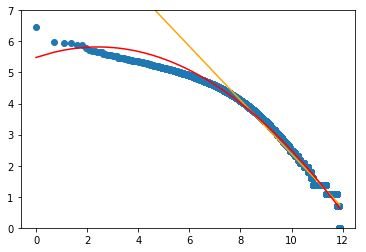

In [28]:
plt.scatter(X, Y)
plt.plot([[i] for i in log_x], diabetes_y_pred, color='orange')
plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'red') 
plt.ylim([0,7])
plt.show()

In [82]:
node_num = []
degree_avg = []
cp = []
edge = []

In [83]:
for k in range(2001, 2019):
    d1_year = d1[(d1['release_year'] >= 2001) & (d1['release_year'] <= k)]
    actor_list_year = list(d1_year['actor_list'])
    edges_list_year = []
    for i in actor_list_year:
        comb = combinations(i, 2)
        for j in list(comb): 
            edges_list_year.append(j)
    edges_list_year

    Gyear = nx.Graph()
    Gyear.add_edges_from(edges_list_year)
    node_num.append(len(Gyear.nodes()))
    degree_avg_value = 2 * len(Gyear.edges()) / len(Gyear.nodes())
    degree_avg.append(degree_avg_value)
    cp_value = 2 * len(Gyear.edges()) / (len(Gyear.nodes()) * (len(Gyear.nodes())-1))
    cp.append(cp_value)
    edge.append(len(Gyear.edges()))

In [84]:
print(node_num)
print(degree_avg)
print(cp)
print(edge)

[9163, 16396, 23042, 29893, 37053, 44890, 52710, 60871, 69259, 78023, 87695, 98499, 109889, 120634, 131011, 140943, 146284, 146365]
[5.457601222307105, 6.323615515979507, 6.820935682666435, 7.11343792861205, 7.479988125118074, 7.724749387391401, 7.942098273572377, 8.132739728277834, 8.316579794683724, 8.44504825500173, 8.545185016249501, 8.64031106914791, 8.677010437805421, 8.68423495863521, 8.689087175885994, 8.7367943069184, 8.787796341363375, 8.799426092303488]
[0.0005956779330175841, 0.0003857039046038126, 0.0002960347069426863, 0.00023797129427980898, 0.00020187812061745855, 0.0001720855752498697, 0.00015067821953693633, 0.00013360834119069875, 0.00012008114289589251, 0.00010823932038401644, 9.74432118075296e-05, 8.772067523348606e-05, 7.89623110604017e-05, 7.198888329590752e-05, 6.632384685051519e-05, 6.198857903902597e-05, 6.007394120549466e-05, 6.0120153127158916e-05]
[25004, 51841, 78584, 106321, 138578, 173382, 209314, 247524, 287999, 329454, 374685, 425531, 476754, 523807, 5

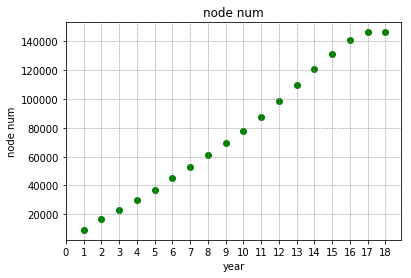

In [72]:
plt.scatter(range(1, 19), node_num, color = 'green')
plt.title('node num')  
plt.xlabel('year')
plt.ylabel('node num')
plt.xticks(range(19))
plt.grid(True,linestyle = "--",color = 'gray' ,linewidth = '0.5',axis='both')
plt.show()

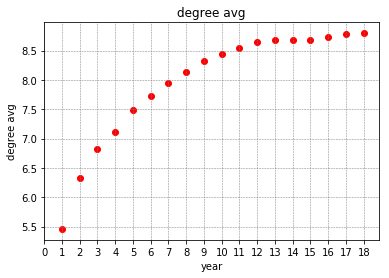

In [71]:
plt.scatter(range(1, 19), degree_avg, color = 'red')
plt.title('degree avg') 
plt.xlabel('year')
plt.ylabel('degree avg')
plt.xticks(range(19))
plt.grid(True,linestyle = "--",color = 'gray' ,linewidth = '0.5',axis='both')
plt.show()

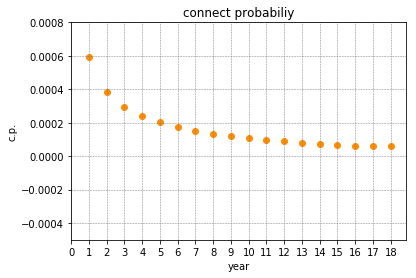

In [79]:
plt.scatter(range(1, 19), cp, color = 'darkorange')
plt.title('connect probabiliy')  
plt.xlabel('year')
plt.ylabel('c.p.')
plt.xticks(range(19))
plt.grid(True,linestyle = "--",color = 'gray' ,linewidth = '0.5',axis='both')
plt.ylim(-0.0005,0.0008)
plt.show()

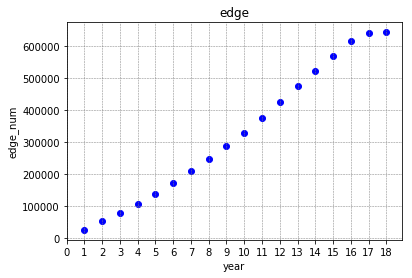

In [85]:
plt.scatter(range(1, 19), edge, color = 'blue')
plt.title('edge')  
plt.xlabel('year')
plt.ylabel('edge_num')
plt.xticks(range(19))
plt.grid(True,linestyle = "--",color = 'gray' ,linewidth = '0.5',axis='both')
plt.show()

In [39]:
df_test = d1[(d1['release_year'] == 2018)]

In [47]:
df_train = d1[d1['release_year'] <= 2018]

In [48]:
actor_list_train = list(df_train['actor_list'])

edges_list_train = []
for i in actor_list_train:
    comb = combinations(i, 2)
    for j in list(comb): 
        edges_list_train.append(j)

G_train = nx.Graph()
G_train.add_edges_from(edges_list_train)

degrees_train = []
for n in G_train.nodes():
    degree_train = len(list(G_train.neighbors(n)))
    degrees_train.append(degree_train)

degrees_ord_train = sorted(degrees_train, reverse=True)

In [42]:
actor_list_test = list(df_test['actor_list'])

edges_list_test = []
for i in actor_list_test:
    comb = combinations(i, 2)
    for j in list(comb): 
        edges_list_test.append(j)

G_test = nx.Graph()
G_test.add_edges_from(edges_list_test)

degrees_test = []
for n in G_test.nodes():
    degree_test = len(list(G_test.neighbors(n)))
    degrees_test.append(degree_test)

degrees_ord_test = sorted(degrees_test, reverse=True)

In [49]:
log_x_train = [log(i) for i in range(1, len(degrees_ord_train)+1)]
log_y_train = [log(i) for i in degrees_ord_train]

log_x_test = [log(i) for i in range(1, len(degrees_ord_test)+1)]
log_y_test = [log(i) for i in degrees_ord_test]

In [50]:
X_train = np.array([[i] for i in log_x_train])
Y_train = np.array([[i] for i in log_y_train])

X_test = np.array([[i] for i in log_x_test])
Y_test = np.array([[i] for i in log_y_test])

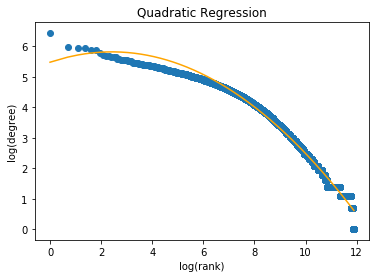

In [51]:
poly_n = PolynomialFeatures(degree = 2) 
X_poly_n = poly.fit_transform(X_train) 
  
poly.fit(X_poly_n, Y_train) 
lin2_n = linear_model.LinearRegression() 
lin2_n.fit(X_poly_n, Y_train)
plt.scatter(X, Y) 
  
plt.plot(X_train, lin2_n.predict(X_poly_n), color = 'orange') 
plt.title('Quadratic Regression') 
plt.xlabel('log(rank)') 
plt.ylabel('log(degree)') 
  
plt.show()

In [52]:
print(lin2_n.coef_)
print('intercept : %.10f' % lin2_n.intercept_ )

[[ 0.          0.28045797 -0.05794086]]
intercept : 5.4820000664
